# Effects of Climate Change on the Polar Cryosphere

### Written by Ariana Miranda (ariana.miranda@temple.edu)

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd
import xarray as xr  #Import NumPy,Matplotlib, Xarray & Pandas packeages for data manipulation, advanced numerical operations and plotting data. 
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import zarr  # to read in Zarr format
import gcsfs # to read google cloud data
import momlevel as ml #import momlevel for SST calc
import cftime
import cmocean #Import to make ocean maps
from cartopy import crs as ccrs, feature as cfeature #Import cartopy to create map figures

In [2]:
xr.set_options(display_style='html')
%matplotlib inline                           
%config InlineBackend.figure_format='retina' 
plt.rcParams['figure.figsize'] = 12,6  #Create figures using matplotlib by defining certain size.

In [3]:
seaice_gridcell_area = xr.open_dataset('/home/ees_student/Miranda_Unit5/data/cell_area_seaiceconc.nc')
OISST_landsea_mask = xr.open_dataset('/home/ees_student/Miranda_Unit5/data/lsmask.nc')
SST_OISST = xr.open_dataset('/home/ees_student/Miranda_Unit5/data/sst.oisst.mon.mean.1993_2022.nc')
seaice_observations = xr.open_zarr('/home/ees_student/Miranda_Unit5/data/seaice_concentration_data') #Import relevant data

#### The cryosphere, Earth's system of frozen ice, snow and permafrost, influences the climate of the Earth due to its albedo, or reflectivity. Incident shortwave radiation is reflected off of snow and ice because its whiteness can reflect up to 90% of solar radiation. As such, sea ice plays an important role in regulating global climate.  Sea ice is frozen sea water that forms during the winter season in polar waters.

#### Decadal data of sea ice extent in the Arctic shows annual sea ice extent is rapidly decreasing due to climate change (Figure 2). Factors contributing to this include a shortening of the winter season, during which the sea ice can grow. Coupled with warmer summers, most sea ice, especially in the Arctic, melt away and decrease the amount of multiyear ice. Multiyear sea ice are ice floes that have survived the summer season. They go on to grow thicker over time as other ice floes crash and grow into each other during consecutive winter seasons.


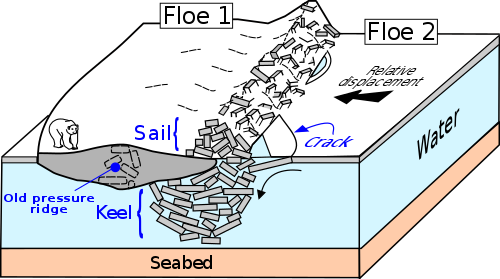
#### **Figure 1.** Process of how multiyear ice forms. Floe 2 collides into floe 1, forming cracks and sinking loose pieces of sea ice beneath the floes. This process will create another pressure ridge where the 2 floes collided, freeze and increase the ice thickness. Image sourced from [Wikimedia Commons.](https://commons.wikimedia.org/wiki/File:Pressure_ridge_(ice)_Formation_Drawing.svg)

#### Sea ice can have an albedo of up to 90% and reflects a significant portion of incident solar radiation, preventing the Earth absorbing it and rereleasing it as longwave radiation to be absorbed by greenhouse gases. The decreasing trend of sea ice cover in the poles reduces the overall albedo of the Earth, and allows for the open ocean, which has an albedo 5-10%, to absorb more longwave radiation. In turn, thhis increases the surface temperature and, thereby, increasing the mean global temperature further.

#### When discussing sea ice, it is important to discuss three important terms: sea ice concentration, sea ice extent and sea ice thickness. Sea ice concentration is the precentage of an area of ocean that has sea ice. Sea ice extent is the amount of ocean that is ice-covered, which is considered an area with a sea ice concentration of 15% per the Natioanl Ice and Snow Data Center (NISDC) standard. Sea ice thickness is measures the thickness of sea ice and which can be used to estimate the volume of ice and age of individual sea ice floes.

#### Multiyear sea ice is more common in the Arctic than the Antartic because of the land-to-ocean ratio and latitude distance. Since the Arctic is surrounded by land, sea ice is restricted in its ability to move around. With the ice in a limited area that remains cold, it is less affected by summer melt. It also has a higher likelihood of amalgamating into other ice floes and grow into each other when the winter returns. Over time, this allows Artctic ice to grow thicker.

#### Meanwhile, the Antarctic is surrounded by ocean. This allows for sea ice to grow unimpeded and covers a larger extent than in the Arctic, but being farther away from the South Pole, most sea ice melts away come summer. Antarctic winds and ocean currents can easily lift floes away from the continent and are less likely to amalgamate with other floes. Antarctic sea ice can only form along the flanks of the Antarctic continent, where it is much warmer. Overall, Antartic sea ice thickness is much lower than the Arctic though its winter extent is much larger. Antarctic sea ice has not shown any siginificant decreasing trend unlike the Arctic.

#### Due to the massive loss of Arctic sea ice, the North Pole is warming faster than anywhere else on the planet, a phenomenon called the Arctic amplification. The cause has been the loss of both overall sea ice extent and lessening multiyear ice, which plays an important part in relfecting longwave radiation on Earth and preventing temperatures from rising. The continued melting of Arctic ice reinforces a positive feedback loop where the decreasing sea ice cascades other processes which increase the surface temperature of the Arctic. These effects are increasing surface temperatures, releases more carbon dioxiode from rampant wildfire, melting of permafrost thereby releasing methane and disruption of jet air stream inlfuecing lower latitude climate. 

#### Sea ice melt does not contribute to rising sea levels because the water for the ice was sourced from the ocean. After ice melts, it will be reincorporated into the ocean. The volume change from water to ice, ice-versa, is negligible. 

#### Below are figures that show the importance of sea ice and their role in regulating Earth's climate. It shows how sea ice has already been affected by climate change based on satelite observations data. Other analyses are based on model data from a future scenarios if humanity continues to burn fossil fuels at much greater amounts as the 21st century progresses. 

#### Sea Ice Extent Analysis

In [4]:
#Area weight sea ice averages then convert from m2 to Mm2 
SIE = seaice_observations*seaice_gridcell_area.cell_area
SIE_Mm2 = SIE*0.000000000001
SIE_weighted = SIE_Mm2.icec 

In [5]:
SIE_weighted

<xarray.DataArray 'icec' (time: 505, lat: 720, lon: 1440)>
dask.array<mul, shape=(505, 720, 1440), dtype=float64, chunksize=(32, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * time     (time) datetime64[ns] 1981-09-01 1981-10-01 ... 2023-09-01

In [6]:
#Get the weighted SIE avg from 1982 to 2010
SIE_1982_2010 = SIE_weighted.sel(time=slice('1982-01-01','2010-12-01'))
SIE_1982_2010_avg = SIE_1982_2010.groupby('time.month').mean(dim='time')

In [7]:
SIE_1982_2010_avg

<xarray.DataArray 'icec' (month: 12, lat: 720, lon: 1440)>
dask.array<stack, shape=(12, 720, 1440), dtype=float64, chunksize=(1, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [8]:
#Slice out for Arctic and sum averages
arc_SIE_1982_2010_avg = SIE_1982_2010_avg.sel(lat=slice(55,90))
arc_SIE_1982_2010_avg_sum = arc_SIE_1982_2010_avg.sum(dim=['lat','lon'])

In [9]:
#Get weighted SIE for 2020
SIE_2020 = SIE_weighted.sel(time=slice('2020-01-01','2020-12-01'))
SIE_2020_avg = SIE_2020.groupby('time.month').mean(dim='time')
arc_SIE_2020_avg = SIE_2020_avg.sel(lat=slice(55,90))
arc_SIE_2020_avg_sum = arc_SIE_2020_avg.sum(dim=['lat','lon'])

In [10]:
#Get weighted SIE for 2021
SIE_2021 = SIE_weighted.sel(time=slice('2021-01-01','2021-12-01'))
SIE_2021_avg = SIE_2021.groupby('time.month').mean(dim='time')
arc_SIE_2021_avg = SIE_2021_avg.sel(lat=slice(55,90))
arc_SIE_2021_avg_sum = arc_SIE_2021_avg.sum(dim=['lat','lon'])

In [11]:
#Get weighted SIE for 2021
SIE_2012 = SIE_weighted.sel(time=slice('2012-01-01','2012-12-01'))
SIE_2012_avg = SIE_2012.groupby('time.month').mean(dim='time')
arc_SIE_2012_avg = SIE_2012_avg.sel(lat=slice(55,90))
arc_SIE_2012_avg_sum = arc_SIE_2012_avg.sum(dim=['lat','lon'])

In [12]:
#Set standard deviations for 1982-2010 weighted avg
arc_SIE_1982_2010_dev = SIE_1982_2010.groupby('time.month').std(dim='time').sel(lat=slice(55,90)).sum(dim=['lat','lon'])

In [13]:
grid = ((seaice_observations.icec*seaice_gridcell_area.cell_area).sel(lat=slice(55,90)).mean(dim=['lat','lon']))/10000000
months_grid = grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').mean(dim='time')
months_grid_dev = grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').std(dim='time') 

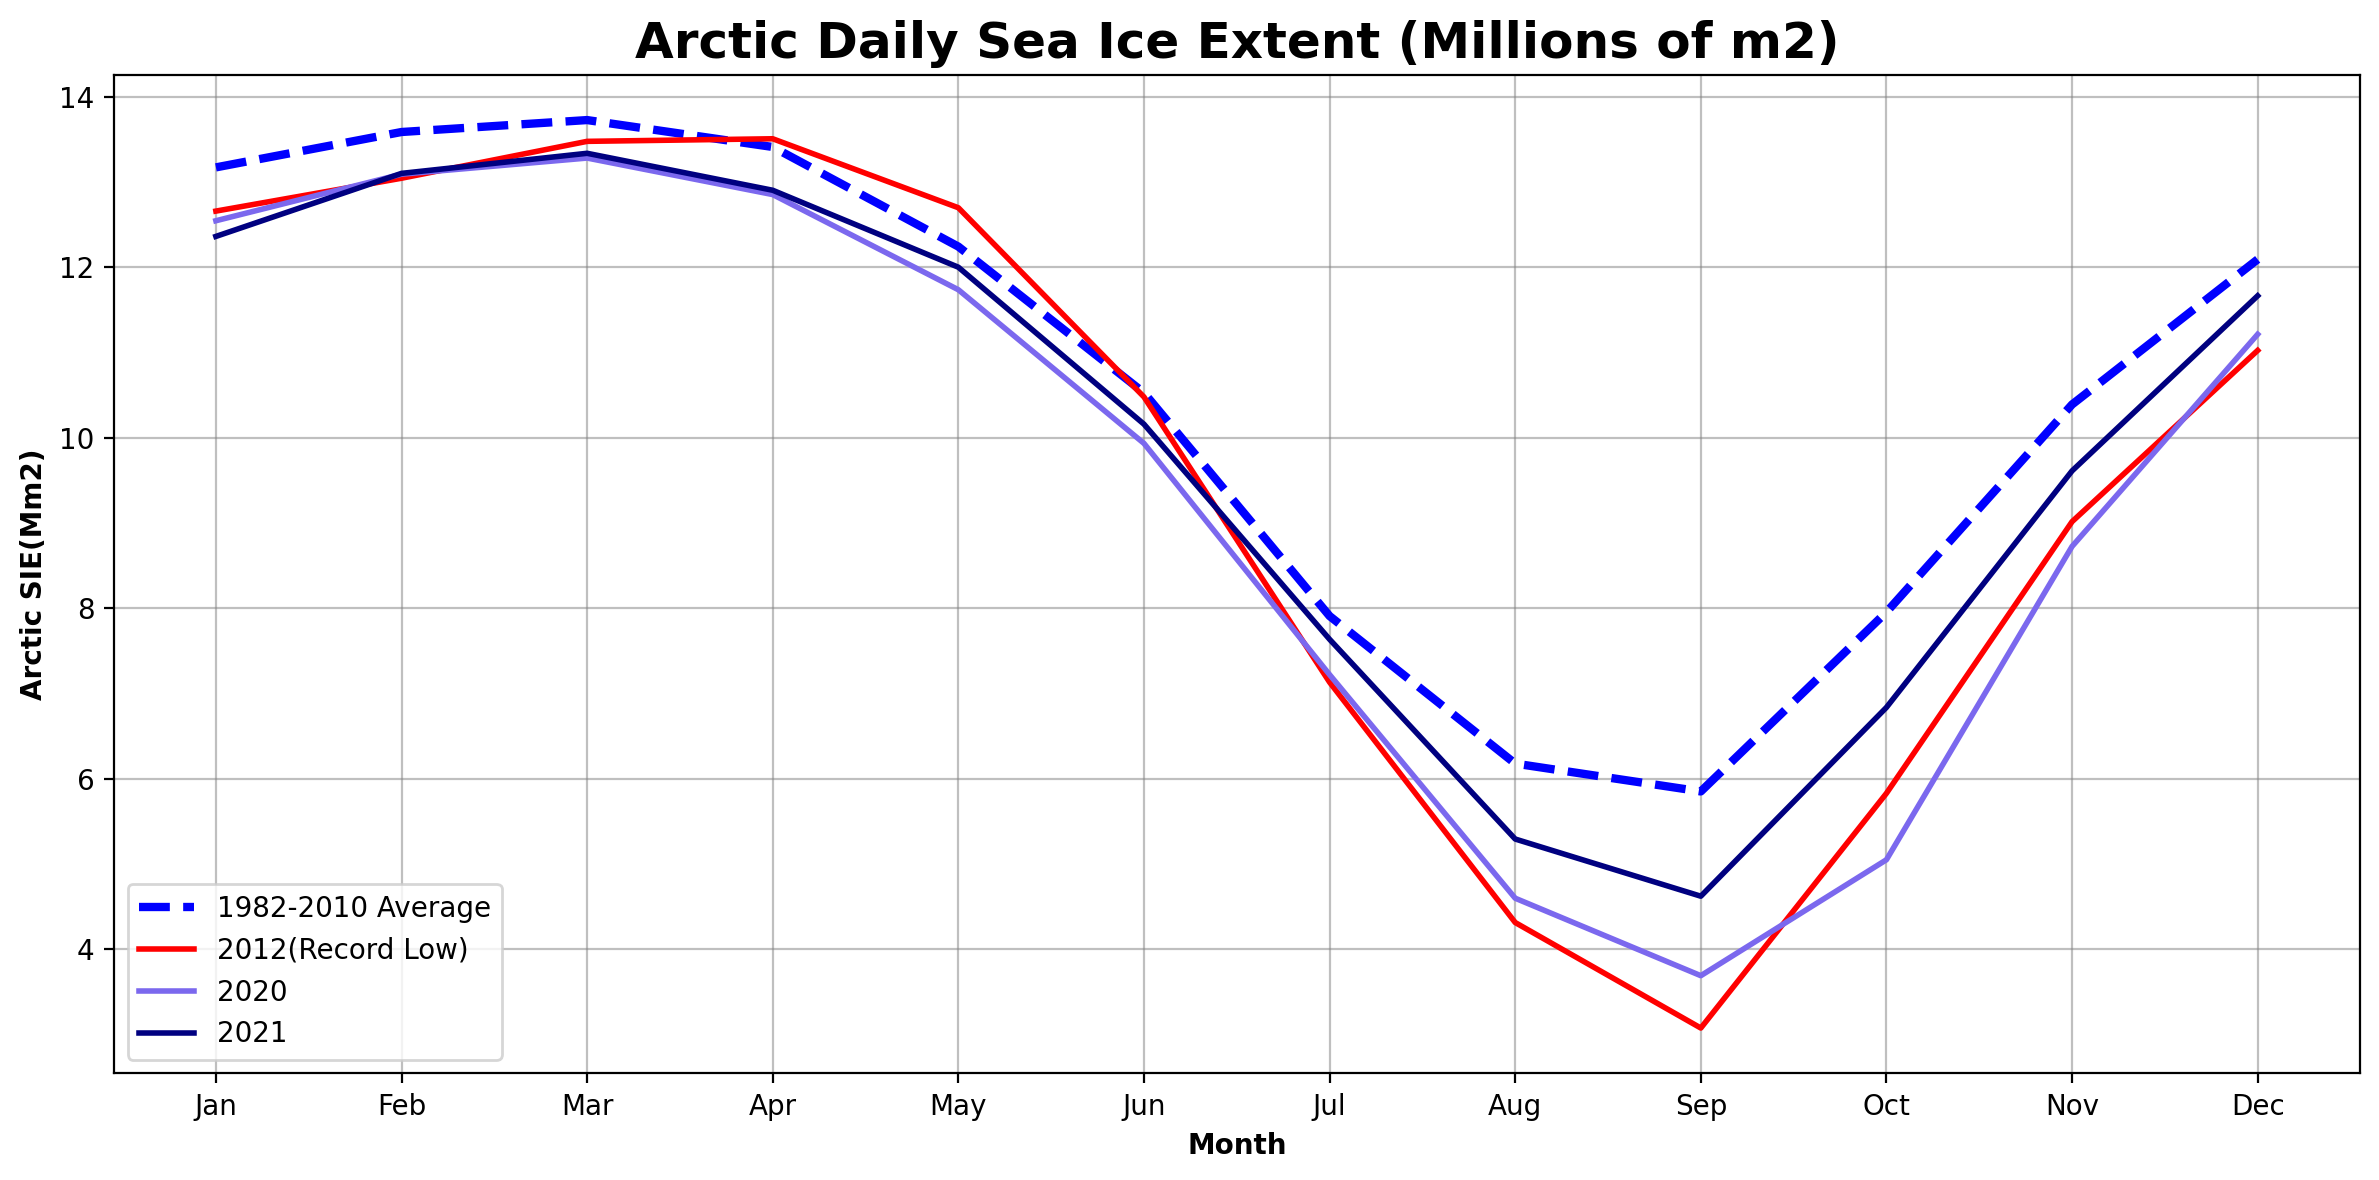

In [14]:
#Group months, remove summed averages laebl and reassign new month coordinates
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
arc_SIE_1982_2010_avg_sum_months = arc_SIE_1982_2010_avg_sum.drop(labels='month').assign_coords({'month':month})
arc_SIE_2012_avg_sum_months = arc_SIE_2012_avg_sum.drop(labels='month').assign_coords({'month':month})
arc_SIE_2020_avg_sum_months = arc_SIE_2020_avg_sum.drop(labels='month').assign_coords({'month':month})
arc_SIE_2021_avg_sum_months = arc_SIE_2021_avg_sum.drop(labels='month').assign_coords({'month':month})

#Set plot with monthly mean SIE data from 1982-2010, 2012, 2020, 2021 to compare results in the Arctic
fig, ax = plt.subplots()  
arc_SIE_1982_2010_avg_sum_months.plot(lw = 3, color = 'blue', linestyle='--', label='1982-2010 Average')
arc_SIE_2012_avg_sum_months.plot(lw = 2, color = 'red', label='2012(Record Low)')
arc_SIE_2020_avg_sum_months.plot(lw = 2, color = 'mediumslateblue', label='2020')
arc_SIE_2021_avg_sum_months.plot(lw = 2, color = 'navy', label='2021')

ax.set_facecolor('white') #Plot backround color white
ax.set_ylabel('Arctic SIE(Mm2)',fontsize=10, fontweight='bold') #Set y axis title
ax.set_xlabel('Month',fontsize=10, fontweight='bold') #Set x axis title
ax.grid(color='grey', alpha=0.5)
ax.legend()    #Add legend to plot
plt.title("Arctic Daily Sea Ice Extent (Millions of m2)", fontsize=18, fontweight='bold') #Add title
plt.tight_layout() # Evenly space plot

#### **Figure 2.** Monthly mean SIE in the Arctic for various for various years. The blue dashed line shows the monthly mean SIE average from 1982 to 2010. In more recent times, 2021 (dark blue) and 2020 (purple) monthly mean SIE show a marked decrease in SIE compared to the 22 year average. 2012 (red) is the lowest year on record for Arctic SIE. Overall, Arctic SIE is decreasing from the late 20th century into the 21st.

In [15]:
#Define function to plot North Pole projection figures
def North_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.NorthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap,levels=30)

    #Set extent of map from 50 to 90 degrees latitude
    ax.set_extent([-180, 180, 55, 90], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [16]:
#Slice sea ice observations in the Arctic and average yearly data across length of dataset
si_time = seaice_observations.icec.sel(time=slice("1982-01-01", "2022-12-01"))
arc_si = si_time.sel(lat=slice(55, 90))
arc_si_monthavg = arc_si.groupby('time.month').mean(dim='time')

In [17]:
arc_si_monthavg

<xarray.DataArray 'icec' (month: 12, lat: 140, lon: 1440)>
dask.array<stack, shape=(12, 140, 1440), dtype=float32, chunksize=(1, 90, 180), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 55.12 55.38 55.62 55.88 ... 89.12 89.38 89.62 89.88
  * lon      (lon) float32 0.125 0.375 0.625 0.875 ... 359.1 359.4 359.6 359.9
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    actual_range:   [0.009999999776482582, 1.0]
    dataset:        NOAA High-resolution Blended Analysis
    level_desc:     Surface
    long_name:      Monthly Mean Sea Ice Concentration
    parent_stat:    Individual Observations
    precision:      2.0
    standard_name:  sea_ice_area_fraction
    statistic:      Monthly Mean
    units:          percent
    valid_range:    [0.0, 1.0]
    var_desc:       Sea Ice Concentration

Text(0.5, 1.0, 'Mean Boreal Summer Sea Ice Minimum Concentration from 1982 to 2022')

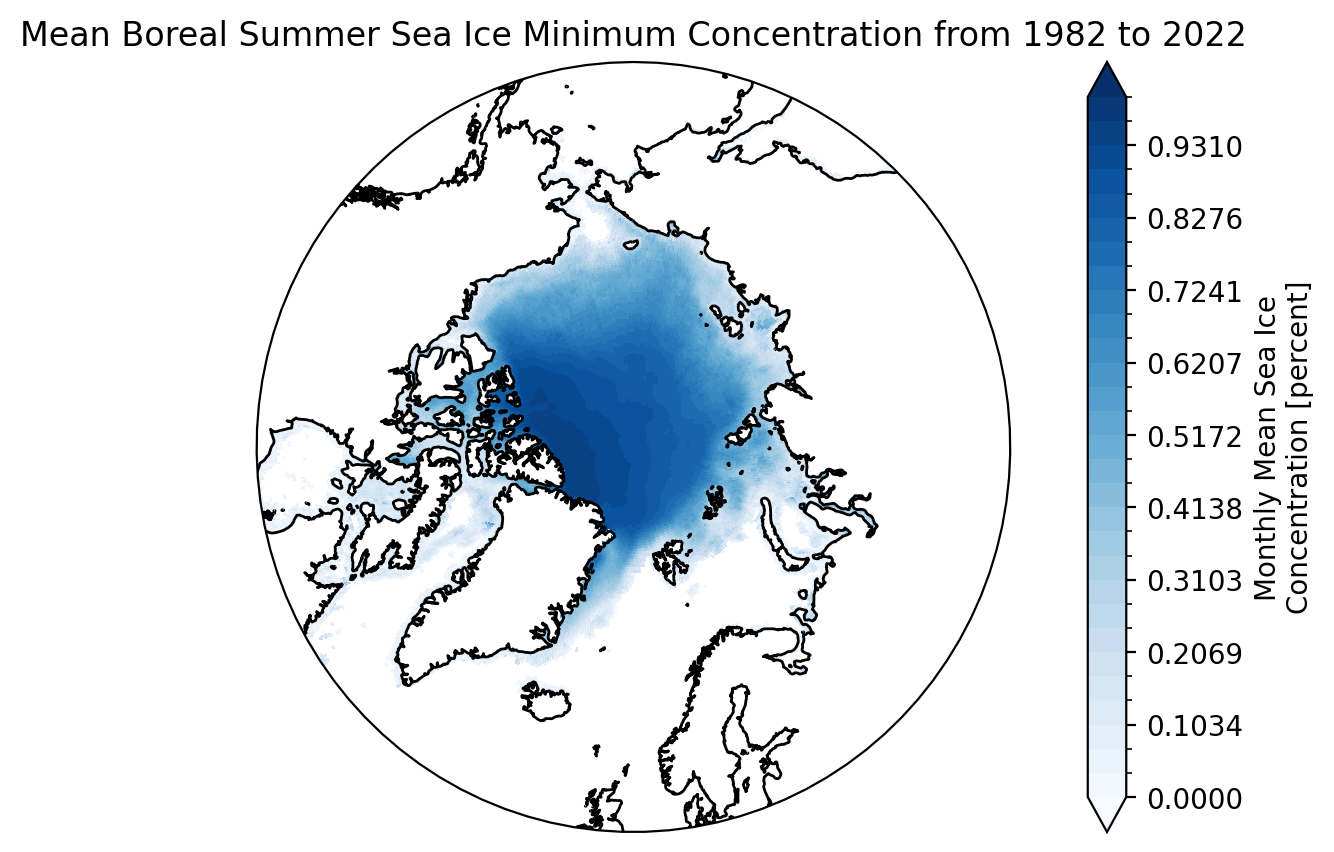

In [18]:
#Plot boreal summer SI minimum
arc_si_sep = arc_si_monthavg.sel(month=9)
arc_si_sep['month']='September'
North_Polar(arc_si_sep,0,1,'Blues')
plt.title('Mean Boreal Summer Sea Ice Minimum Concentration from 1982 to 2022') #Set title

#### **Figure 3.** The averaged minimum extent of Arctic sea ice concentration during boreal summer (September).

Text(0.5, 1.0, 'Mean Boreal Winter Sea Ice Maximum Concentration from 1982 to 2022')

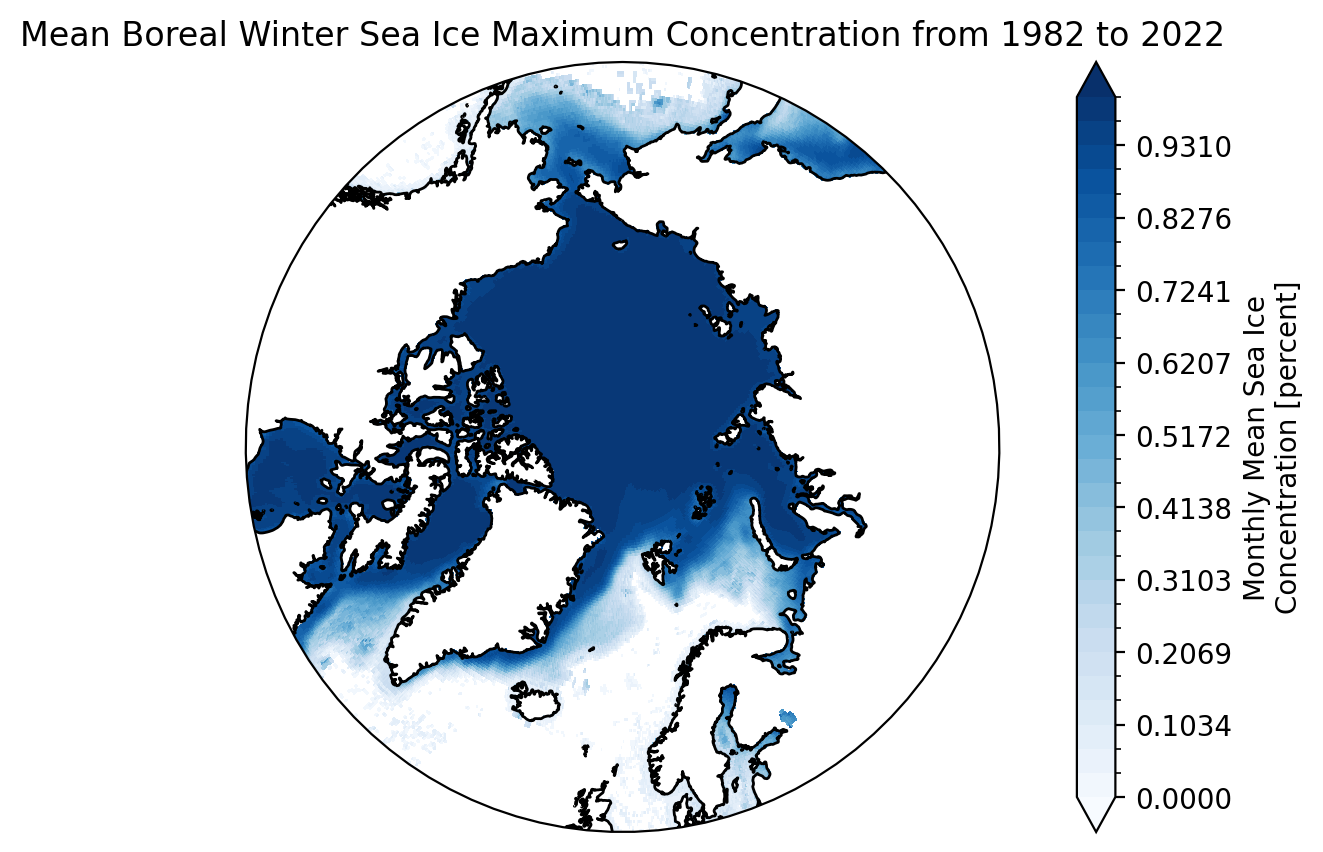

In [19]:
#Plot boreal winter SI maximum
arc_si_mar = arc_si_monthavg.sel(month=3)
arc_si_mar['month']='March'
North_Polar(arc_si_mar,0,1,'Blues')
plt.title('Mean Boreal Winter Sea Ice Maximum Concentration from 1982 to 2022') #Set title

#### Figure 4. The averaged maximum extent of Arctic sea ice concentration during boreal winter (March).

In [20]:
#Get the weighted SIE avg from 1982 to 2010
ant_SIE_1982_2010_avg = SIE_1982_2010_avg.sel(lat=slice(-90,-55))
ant_SIE_1982_2010_avg_sum = ant_SIE_1982_2010_avg.sum(dim=['lat','lon'])

#Get the weighted SIE avg for 2012
ant_SIE_2012 = SIE_weighted.sel(time=slice('2012-01-01','2012-12-01')) #Create new variable defining 2012 for weighted SIE
ant_SIE_2012_avg = SIE_2012.groupby('time.month').mean(dim='time')

ant_SIE_2012_avg = SIE_2012_avg.sel(lat=slice(-90,-55))
ant_SIE_2012_avg_sum = ant_SIE_2012_avg.sum(dim=['lat','lon'])

#Get the weighted SIE avg for 2020
ant_SIE_2020 = SIE_weighted.sel(time=slice('2020-01-01','2020-12-01')) #Create new variable defining 2020 for weighted SIE
ant_SIE_2020_avg = SIE_2020.groupby('time.month').mean(dim='time')

ant_SIE_2020_avg = SIE_2020_avg.sel(lat=slice(-90,-55))
ant_SIE_2020_avg_sum = ant_SIE_2020_avg.sum(dim=['lat','lon'])

#Get the weighted SIE avg for 2021
ant_SIE_2021 = SIE_weighted.sel(time=slice('2021-01-01','2021-12-01')) #Create new variable defining 2021 for weighted SIE
ant_SIE_2021_avg = SIE_2021.groupby('time.month').mean(dim='time')

ant_SIE_2021_avg = SIE_2021_avg.sel(lat=slice(-90,-55))
ant_SIE_2021_avg_sum = ant_SIE_2021_avg.sum(dim=['lat','lon'])

In [21]:
ant_grid = ((seaice_observations.icec*seaice_gridcell_area.cell_area).sel(lat=slice(-90,-55)).mean(dim=['lat','lon']))/10000000
ant_months_grid = ant_grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').mean(dim='time')
ant_months_grid_dev = ant_grid.sel(time=slice('1982-01-01','2009-12-01')).groupby('time.month').std(dim='time') 

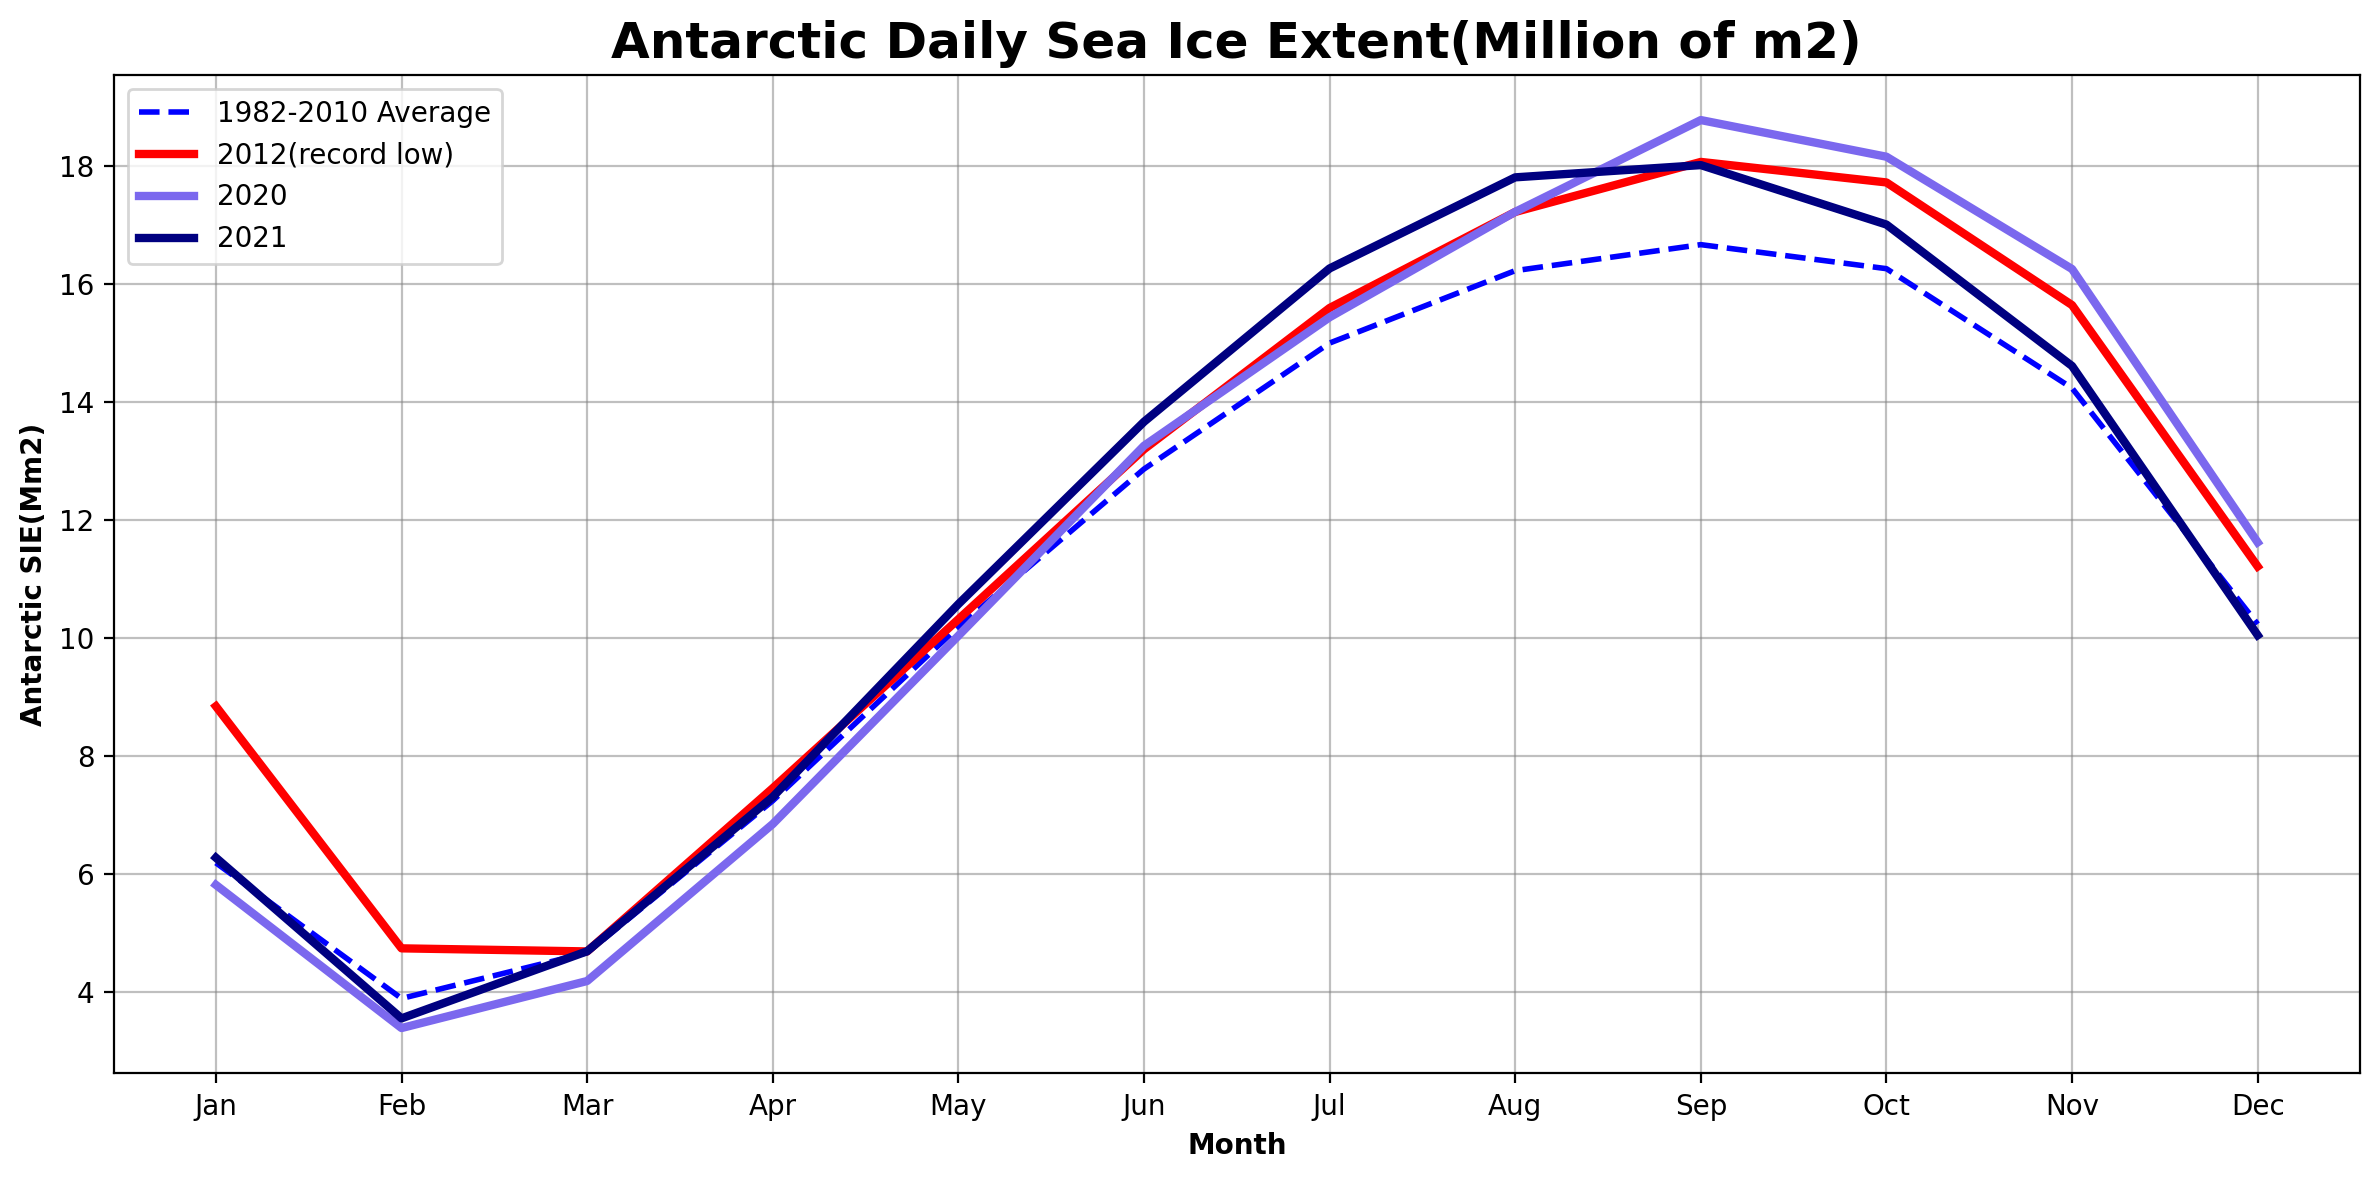

In [22]:
#Group months, remove summed averages laebl and reassign new month coordinates
month = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ant_SIE_1982_2010_avg_sum_months = ant_SIE_1982_2010_avg_sum.drop(labels='month').assign_coords({'month':month})
ant_SIE_2012_avg_sum_months = ant_SIE_2012_avg_sum.drop(labels='month').assign_coords({'month':month})
ant_SIE_2020_avg_sum_months = ant_SIE_2020_avg_sum.drop(labels='month').assign_coords({'month':month})
ant_SIE_2021_avg_sum_months = ant_SIE_2021_avg_sum.drop(labels='month').assign_coords({'month':month})

#Set plot with monthly mean SIE data from 1982-2010, 2012, 2020, 2021 to compare results in the Antarctic  
fig, ax = plt.subplots()  
ant_SIE_1982_2010_avg_sum_months.plot(lw = 2, color = 'blue', linestyle='--', label='1982-2010 Average')
ant_SIE_2012_avg_sum_months.plot(lw = 3, color = 'red', label='2012(record low)')
ant_SIE_2020_avg_sum_months.plot(lw = 3, color = 'mediumslateblue', label='2020')
ant_SIE_2021_avg_sum_months.plot(lw = 3, color = 'navy', label='2021')

ax.set_facecolor("white") #Set plot background to white
ax.set_ylabel('Antarctic SIE(Mm2)',fontsize=10, fontweight='bold') #Set yaxis title
ax.set_xlabel('Month',fontsize=10, fontweight='bold') #Set xaxis title
ax.grid(color='grey', alpha=0.5) #Add grid to plot
ax.legend()    #Add legend 
plt.title("Antarctic Daily Sea Ice Extent(Million of m2)",fontsize=18, fontweight='bold') #Add title
plt.tight_layout() #Space plot nicely

#### **Figure 5.** Monthly mean SIE in the Antrctic for various for various years. The blue dashed line shows the monthly mean SIE average from 1982 to 2010 with standard deviations (gray). In more recent times, 2021 (dark blue) and 2020 (purple) monthly mean SIE show a marked decrease in SIE compared to the 22-year average. 2012 (red) is the lowest year on record for Arctic SIE. Overall, Arctic SIE is decreasing from the late 20th century into the 21st.

In [23]:
#Define function to plot South Pole projection figures
def South_Polar(array,vmin,vmax,cmap):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws)
    
    array.plot(ax=ax,
               transform =ccrs.PlateCarree(),
               vmin=vmin,
               vmax=vmax,
               extend='both',
               cmap=cmap, levels=30)

      #Set extent of map from -55 to -90 degrees latitude.
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [24]:
#Plot pole w/3 columns
def South_Polar_Three(ncols):
    subplot_kws = dict(projection=ccrs.SouthPolarStereo()) 
    fig, ax = plt.subplots(figsize=[10, 5],subplot_kw=subplot_kws, ncols=ncols)
    
         #Set extent of map from -55 to -90 degrees latitude.
    ax.set_extent([-180, 180, -90, -55], ccrs.PlateCarree())
    
    # Compute a circle in axes coordinates, which we can use as a boundary
    # for the map. We can pan/zoom as much as we like - the boundary will be
    # permanently circular.
    
    theta = np.linspace(0, 2*np.pi, 100)
    center, radius = [0.5, 0.5], 0.5
    verts = np.vstack([np.sin(theta), np.cos(theta)]).T
    circle = mpath.Path(verts * radius + center)

    ax.set_boundary(circle, transform=ax.transAxes)
    ax.coastlines()

In [25]:
#Slice variable for sea ice observations from 1982 to 2022 in Antarctica
si_time = seaice_observations.icec.sel(time=slice("1982-01-01", "2022-12-01"))
ant_si = si_time.sel(lat=slice(-90, -55))
ant_si_monthavg = ant_si.groupby('time.month').mean(dim='time') #Group by month

Text(0.5, 1.0, 'Mean Austral Winter Sea Ice Maximum Concentration from 1982 to 2022')

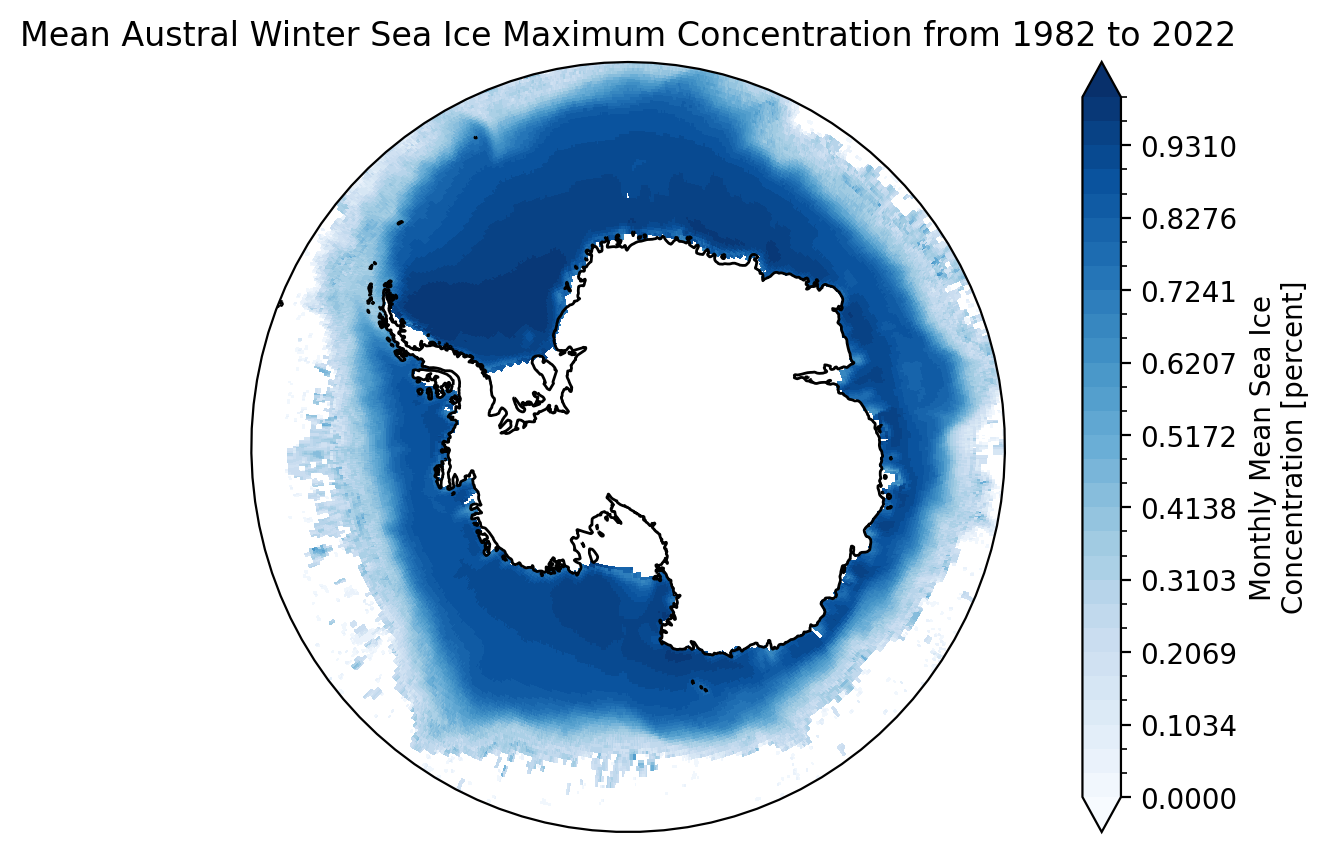

In [26]:
# Plot austral winter SI maximum
ant_si_aug = ant_si_monthavg.sel(month=8)
ant_si_aug['month']='August'
South_Polar(ant_si_aug,0,1,'Blues')
plt.title('Mean Austral Winter Sea Ice Maximum Concentration from 1982 to 2022') #Set title

#### **Figure 6.** The averaged maximum extent of Antarctic sea ice concentration during austral winter (August).

Text(0.5, 1.0, 'Mean Austral Summer Sea Ice Minimum Concentration from 1982 to 2022')

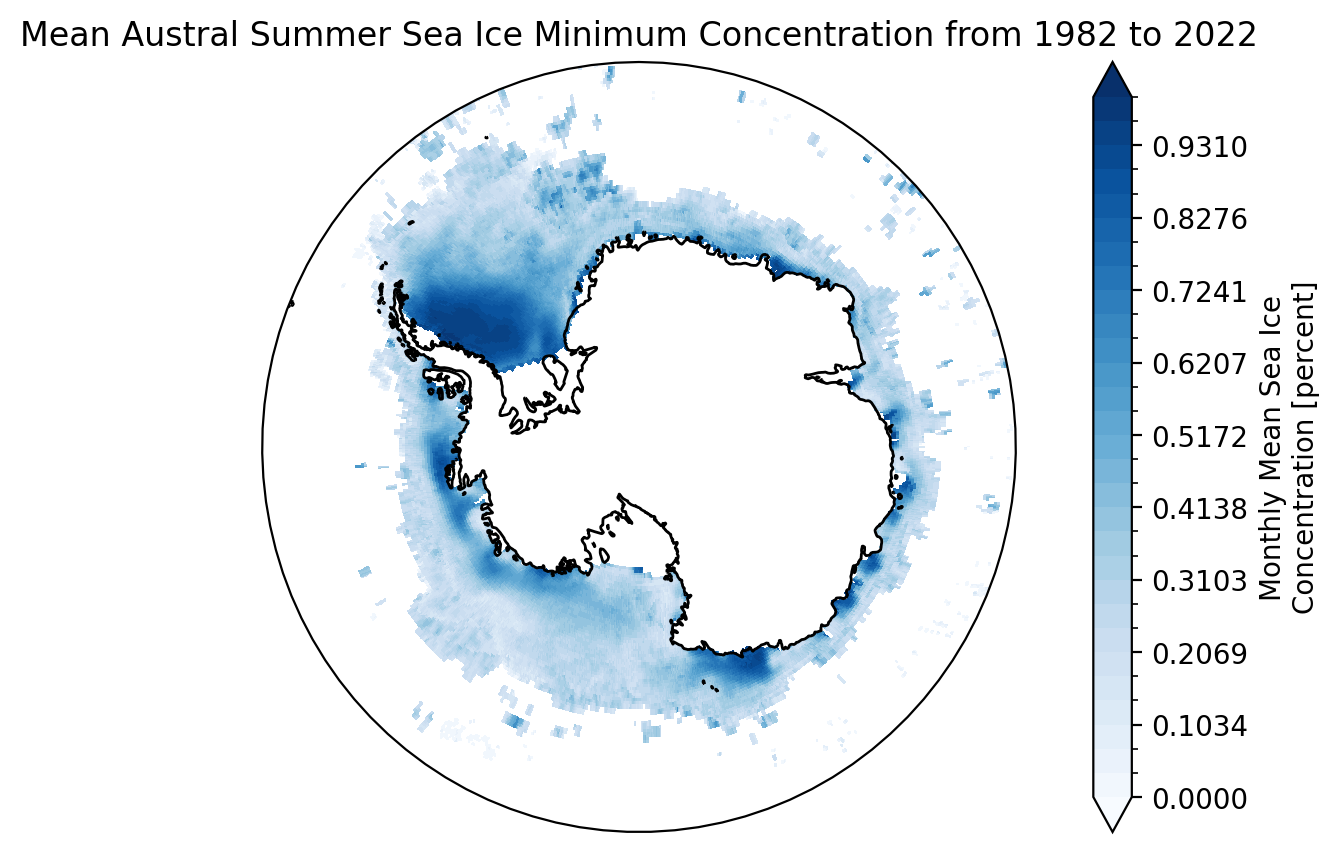

In [27]:
#Plot austral summer SI minimum
ant_si_feb = ant_si_monthavg.sel(month=2)
ant_si_feb['month']='February'
South_Polar(ant_si_feb,0,1,'Blues')
plt.title('Mean Austral Summer Sea Ice Minimum Concentration from 1982 to 2022') #Set title


#### **Figure 7.** The averaged minimum extent of Antarctic sea ice concentration during austral summer (Feburary).

## Sea Surface Temperature (SST) Observation Analysis

In [28]:
#Slice out SST observed data in the first 5 years and last 5 years of dataset
global_f5 = SST_OISST.sel(time=slice('1993-07-02','1998-07-02'))
global_l5 = SST_OISST.sel(time=slice('2017-07-02','2022-07-02'))

#TIme average SST data from 2 variables
global_f5_avg = global_f5.mean(dim=['time'])
global_l5_avg = global_l5.mean(dim=['time'])

#Find the difference in average temperature
global_SST_diff = global_l5_avg - global_f5_avg

global_SST_diff

<xarray.Dataset>
Dimensions:  (lat: 180, lon: 360)
Coordinates:
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.0 1.0 2.0 3.0 4.0 ... 355.0 356.0 357.0 358.0 359.0
Data variables:
    sst      (lat, lon) float32 nan nan nan nan ... -0.1112 -0.1202 -0.1157

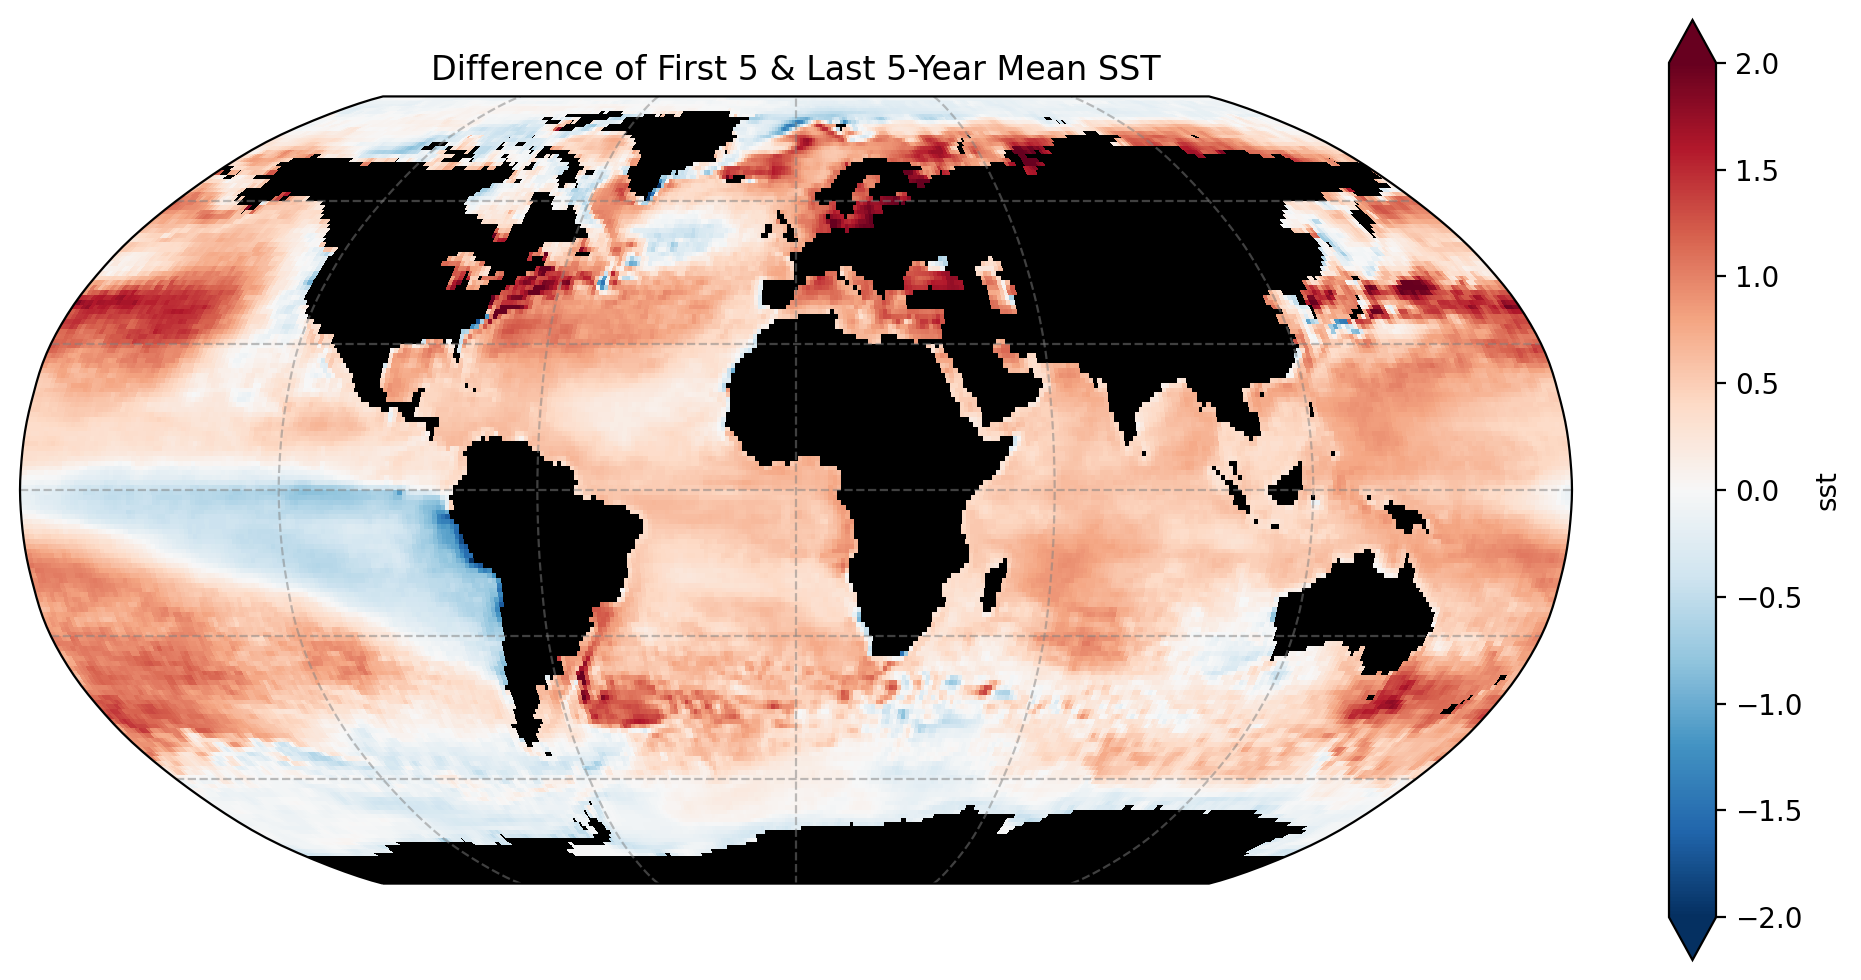

In [29]:
#Plot our data for global difference
subplot_kws=dict(projection=ccrs.Robinson(),facecolor='black')
fig, ax = plt.subplots(figsize=(10,5),subplot_kw=subplot_kws) 

global_SST_diff.sst.plot(ax=ax,cmap='RdBu_r',vmin=-2,vmax=2, extend='both',transform=ccrs.PlateCarree())

ax.set_title('Difference of First 5 & Last 5-Year Mean SST') #Set title
ax.gridlines(color='grey', alpha=0.5, linestyle='--') #Set lat & lon style

plt.tight_layout() #Space out plot evenly

#### **Figure 8.** The difference of observed mean annual SST data from 1993-1998 and 2017-2022. There is a increase in the SST (red) across the globe except for the western coast of South America and around Antartica. The blue off western S. America is the climate phenomena 'El Nino'. Antartica becomes colder likely due to the shielding that is provided by the Antartic Circumpolar Current.

In [30]:
lat_sst = SST_OISST.coords['lat'].values # Defining 1-D numpy array of model's latitude values from SST_OISST variable
lon_sst = SST_OISST.coords['lon'].values # Defining 1-D numpy array of model's longitude values from SST_OISST variable

# The following function is used to create weights for the Earth's grid space.
import warnings 

def standard_grid_cell_area(lat, lon, rE=6371.0e3):
    """ computes the cell area for a standard spherical grid """

    dLat = lat[1] - lat[0]
    dLon = lon[1] - lon[0]
    area = np.empty((len(lat), len(lon)))
    for j in range(0, len(lat)):
        for i in range(0, len(lon)):
            lon1 = lon[i] + dLon / 2
            lon0 = lon[i] - dLon / 2
            lat1 = lat[j] + dLat / 2
            lat0 = lat[j] - dLat / 2
            area[j, i] = (
                (np.pi / 180.0)
                * rE
                * rE
                * np.abs(np.sin(np.radians(lat0)) - np.sin(np.radians(lat1)))
                * np.abs(lon0 - lon1)
            )
    return area
    
# Pass the arrays to the standard_grid_cell_area function
areacell = standard_grid_cell_area(lat_sst,lon_sst)  
areacell_xarray = xr.DataArray(areacell,dims=({'lat':180, 'lon':360}),  
                                                coords=(SST_OISST.coords['lat'],\
                                                        SST_OISST.coords['lon']))

weights = areacell_xarray*OISST_landsea_mask.mask #Defining a new variable via the function to omit SST data from 
                                                  #land areas. Done by multiplying areaceell_xarray by land_sea_mask
weighted_average_SST = SST_OISST.weighted(weights).mean(['lat', 'lon']) 
#Create new variable of weighted SST using calculated weights from above and averaging both variables across the
#globe using lat & lon


## GFDL-ESM4 Model Analysis

#### The following analyses uses output data from the Earth System Model (GFDL-ESM4) developed by Geophysical Fluid Dynamics Laboratory. The model uses a high emissions scenario (RCP8.5) as defined by the International Panel on Climate Change (IPCC) and calculates the daily sea ice extent (SIE) and sea surface temperature (SST). The first section reviews analyses of SIE model data. The second reviews SST model data.

#### Changes in SST Analysis

In [31]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
gfdl_esm4_sea_ice_data = df.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'SImon' & \
    variable_id == 'siconc' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p1f1'"
)

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore_siconc = gfdl_esm4_sea_ice_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_siconc = gcs.get_mapper(zstore_siconc)
# open the dataset using xarray and zarr
gfdl_esm4_historical_siconc = xr.open_zarr(mapper_siconc, 
                                         consolidated=True,use_cftime=True
                                         ).siconc.rename({'y':'latitude',
                                                             'x':'longitude',
                                                             'lat':'geolat',
                                                             'lon':'geolon'})

In [32]:
gfdl_esm4_cell_area_data = df.query(
    "activity_id=='CMIP' & \
    table_id == 'Ofx' & \
    variable_id == 'areacello' & \
    experiment_id == 'piControl' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gn'")

# get the path to a specific zarr store (the first one from the dataframe above)
zstore_area = gfdl_esm4_cell_area_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_area = gcs.get_mapper(zstore_area)
# open the dataset using xarray and zarr
gfdl_esm4_cell_area = xr.open_zarr(mapper_area, 
                                         consolidated=True,
                                         ).areacello.rename({'y':'latitude',
                                                             'x':'longitude',
                                                             'lat':'geolat',
                                                             'lon':'geolon'})

In [33]:
gfdl_esm4_cell_area_arc=gfdl_esm4_cell_area.sel(latitude=slice(0,89.89)) #Slice out cell area in Arctic 
gfdl_esm4_cell_area_ant=gfdl_esm4_cell_area.sel(latitude=slice(-77.91,0)) #Slice out cell area in Antarctic 

In [34]:
gfdl_esm4_historical_siconc_arc=gfdl_esm4_historical_siconc.sel(latitude=slice(0,89.89)) #Slice out sea ice (si) in Arctic 
gfdl_esm4_historical_siconc_ant=gfdl_esm4_historical_siconc.sel(latitude=slice(-77.91,0)) #Slice out si in Antarctic 
sie_arc= gfdl_esm4_historical_siconc_arc*gfdl_esm4_cell_area_arc #Calculating the sea ice extent (SIE) for arctic 
sie_ant=gfdl_esm4_historical_siconc_ant*gfdl_esm4_cell_area_ant #Calculating SIE in the Antarctic
sie_annual_arc = (ml.util.annual_average(sie_arc,tcoord='time'))
sie_annual_ant = (ml.util.annual_average(sie_ant,tcoord='time'))

In [35]:
#Slice variables to make array of Antarctic mean SIE for 2014-2025 data
ant_2014_2025 = sie_annual_ant.sel(time=slice('2014-07-02','2025-07-02'))
ant_2014_2025_avg = ant_2014_2025.mean('time')
ant_sie_f10 = ant_2014_2025_avg.sum(dim = ['latitude','longitude'])

#Slice variables to make array of Arctic mean SIE for 2014-2025 data
arc_2014_2025 = sie_annual_arc.sel(time=slice('2014-07-02','2025-07-02'))
arc_2014_2025_avg = arc_2014_2025.mean('time')
arc_sie_f10 = arc_2014_2025_avg.sum(dim = ['latitude','longitude'])

In [36]:
#Slice variables to make array of Antarctic mean SIE for 2081-2100 data
ant_2081_2100 = sie_annual_ant.sel(time=slice('2081-07-02','2100-07-02'))
ant_2081_2100_avg = ant_2081_2100.mean('time')
ant_sie_l20 = ant_2081_2100_avg.sum(dim = ['latitude','longitude'])

#Slice variables to make array of Arctic mean SIE for 2081-2100 data
arc_2081_2100 = sie_annual_ant.sel(time=slice('2081-07-02','2100-07-02'))
arc_2081_2100_avg = arc_2081_2100.mean('time')
arc_sie_l20 = arc_2081_2100_avg.sum(dim = ['latitude','longitude'])

In [37]:
#Calculate the difference in the first 10 years of the 21 century from the last 20 from model data
ant_change = ant_2081_2100_avg - ant_2014_2025_avg
arc_change = arc_2081_2100_avg - arc_2014_2025_avg

In [38]:
ant_change

<xarray.DataArray (latitude: 264, longitude: 720)>
dask.array<sub, shape=(264, 720), dtype=float64, chunksize=(264, 720), chunktype=numpy.ndarray>
Coordinates:
    geolat     (latitude, longitude) float32 -77.91 -77.91 -77.91 ... -0.0 -0.0
    geolon     (latitude, longitude) float32 -299.8 -299.2 ... 59.25 59.75
  * longitude  (longitude) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * latitude   (latitude) float64 -77.91 -77.72 -77.54 ... -0.5128 -0.2564 -0.0

In [39]:
arc_change

<xarray.DataArray (latitude: 1, longitude: 720)>
dask.array<sub, shape=(1, 720), dtype=float64, chunksize=(1, 720), chunktype=numpy.ndarray>
Coordinates:
  * longitude  (longitude) float64 -299.8 -299.2 -298.8 ... 58.75 59.25 59.75
  * latitude   (latitude) float64 -0.0
    geolat     (latitude, longitude) float32 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    geolon     (latitude, longitude) float32 -299.8 -299.2 ... 59.25 59.75

In [49]:
#Convert SIE from m2 to km2 
ant_sie_f10_km=ant_sie_f10*0.000001
arc_sie_f10_km=arc_sie_f10*0.000001
ant_sie_l20_km=ant_sie_l20*0.000001
arc_sie_l20_km=arc_sie_l20*0.000001

In [50]:
arc_sie_f10_km.values

array(9.23274432e+08)

In [52]:
arc_sie_l20_km.values

array(5.35718073e+08)

In [53]:
ant_sie_f10_km.values

array(8.18007912e+08)

In [54]:
ant_sie_l20_km.values

array(5.35718073e+08)

In [58]:
arc_sie_diff= arc_sie_f10_km - arc_sie_l20_km
arc_sie_roc=(arc_sie_f10_km-arc_sie_diff)/arc_sie_f10_km

ant_sie_diff= ant_sie_f10_km - ant_sie_l20_km
ant_sie_roc=(ant_sie_f10_km-ant_sie_diff)/ant_sie_f10_km

In [61]:
arc_sie_roc.values

array(0.58023709)

In [60]:
ant_sie_roc.values

array(0.65490574)

#### Based on model data, mean annual SIE will decrease 58% in the Arctic and 65.5% in the Antarctic compared to the beginning to the end of the 21st century.

In [ ]:
ant_2014_2025_avg

In [ ]:
#Create new arrays for Arctic and Antarctic annual SIE over 21st century
sie = gfdl_esm4_historical_siconc*gfdl_esm4_cell_area
sie_arc = sie.sel(latitude=slice(0,90))
sie_arc_total = sie_arc.sum(dim=['latitude','longitude'])
annual_sie_arc_total = ml.util.annual_average(sie_arc_total,tcoord='time')

sie = gfdl_esm4_historical_siconc*gfdl_esm4_cell_area
sie_ant = sie.sel(latitude=slice(-90,0))
sie_ant_total = sie_ant.sum(dim=['latitude','longitude'])
annual_sie_ant_total = ml.util.annual_average(sie_ant_total,tcoord='time')

fig, ax0 = plt.subplots()                        
annual_sie_arc_total.convert_calendar('Gregorian').plot(ax=ax0,    #DataArray.plot(ax=axis_to_plot_on)
                            color='blue',    #color of the line
                            label='Arctic Mean Annual SIE')    #legend label  

                      
annual_sie_ant_total.convert_calendar('Gregorian').plot(ax=ax0,    #DataArray.plot(ax=axis_to_plot_on)
                            color='dodgerblue',    #color of the line
                            label='Antarctic Mean Annual SIE')    #legend label      

ax0.set_ylabel('Mean Sea Ice Extent(in m2)',fontsize=12, fontweight='bold') #Add yaxis title
ax0.set_xlabel('Year',fontsize=12,fontweight='bold') #Add xaxis title
ax0.legend() #Add legend
plt.title("Annual Mean Sea Ice Extent from 2014-2100", fontsize=18, fontweight='bold') #Add title and design considerations
plt.tight_layout() #Space plot nicely

#### **Figure 10.** Modeled mean annual sea ice extent in the Arctic (blue) and Antartic (medium blue) under the modeled RCP8.5 high emissions scenario. The Arctic has a markedly large decrease in SIE as the 21st century progresses. The Antarctic doesn't begin losing significant SIE until the mid 2050s since it is partially protected by the ACC blocking the mixing of equatorial warm waters. Conversely, the Arctic is under the positive feedback of the Arctic Amplification effect. 

#### Changes in SST Analysis

In [ ]:
gfdl_esm4_sst_data = df.query(
    "activity_id=='ScenarioMIP' & \
    table_id == 'Omon' & \
    variable_id == 'tos' & \
    experiment_id == 'ssp585' & \
    institution_id == 'NOAA-GFDL' &  \
    source_id == 'GFDL-ESM4' & \
    grid_label == 'gn' & \
    member_id == 'r1i1p1f1'"
)

# this only needs to be created once
gcs = gcsfs.GCSFileSystem(token='anon')
# get the path to a specific zarr store (the first one from the dataframe above)
zstore_sst = gfdl_esm4_sst_data.zstore.values[-1]
# create a mutable-mapping-style interface to the store
mapper_sst = gcs.get_mapper(zstore_sst)
# open the dataset using xarray and zarr
gfdl_esm4_historical_sst = xr.open_zarr(mapper_sst, 
                                         consolidated=True,use_cftime=True
                                         ).tos.rename({'y':'latitude',
                                                             'x':'longitude',
                                                             'lat':'geolat',
                                                             'lon':'geolon'})

In [ ]:
#Create variable of global area weighted annual SST
global_SST = gfdl_esm4_historical_sst 
global_SST_annual = ml.util.annual_average(global_SST, tcoord='time')

global_area = gfdl_esm4_cell_area
global_warea_SST = global_SST_annual.weighted(global_area).mean(['latitude', 'longitude'])

#Create variable of Arctic area weighted annual SST
arc_SST = global_SST.sel(latitude=slice(55,90))
arc_SST_annual = ml.util.annual_average(arc_SST, tcoord='time')

arc_area = global_area.sel(latitude=slice(55, 90))
arc_warea_SST = arc_SST_annual.weighted(arc_area).mean(['latitude', 'longitude'])

#Create variable of Antarctic area weighted annual SST
ant_SST = global_SST.sel(latitude=slice(-90, -55))
ant_SST_annual = ml.util.annual_average(ant_SST, tcoord='time')

ant_area = global_area.sel(latitude=slice(-90, -55))
ant_warea_SST = ant_SST_annual.weighted(ant_area).mean(['latitude', 'longitude'])


In [ ]:
#Plot global_SST model data 
fig, (ax) = plt.subplots(figsize=(8,5)) 
global_warea_SST.plot(linewidth=1.5, label='Global', color='red')
ax.set_ylabel('Mean Sea Surface Temperature (Celsius)',fontsize=10, fontweight='bold')
ax.set_xlabel('Year',fontsize=10, fontweight='bold')
ax.legend() #Add legend
fig.suptitle('Global Mean Annual Sea Surface Temperature from 2014 to 2100', fontsize=16, fontweight='bold')
plt.tight_layout() #Space figure neatly

#### **Figure 12.** Global change in annual mean SST in Celsius calculated from the GFDL-ESM4 dataset. There is a positive trend of increasing mean annual SST throughout the 21st century under the high emissions scenario.

In [ ]:
#Plot Arctic and Antarctic area weighted SST model data for 21st century
fig, (ax) = plt.subplots(figsize=(9,5)) 
arc_warea_SST.plot(linewidth=1, label='Arctic',color='blue')
ant_warea_SST.plot(linewidth=1, label='Antarctic',color='dodgerblue')
ax.set_ylabel('Mean Sea Surface Temperature (Celsius)',fontsize=10, fontweight='bold')
ax.set_xlabel('Year',fontsize=10, fontweight='bold')
fig.suptitle('Annual Sea Surface Temperature Throughout 21st Century', fontsize=16, fontweight='bold')
ax.legend()

#### **Figure 13.** Change in annual mean SST in Celsius calculated from the GFDL-ESM4 dataset. Both Antarctic and Arctic SST has an overall increasing trend. The Arctic (blue) is increasing faster pronounced due to the Arctic amplification effect. In the Antarctic (light blue), the SST remains somewhat stable until the 2050s, then increases from then to the end of the 21st century.